# **HOUSE PRICE DETECTION PROJECT USING SIMPLE LINEAR REGRESSION, MULTIPLE LINEAR REGRESSION AND POLYNOMIAL REGRESSION**

DATASET useed: https://www.kaggle.com/datasets/shree1992/housedata/code?datasetId=46927 

IMPORTING LIBRARIES

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

LOADING DATASET

In [4]:
dataset = pd.read_csv("data.csv")
dataset.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


EXPLORATORY DATA ANALYSIS

In [59]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

**SIMPLE LINEAR REGRESSION MODEL**


---

In the following experiment a simple linear regression model is build to predict the price of a house on the basis of sq feet living. 

In simple linear regression model we can have only one independent variable. 
As you know the dataset has various features. In order to implement a simple linear regression model, I have assumed "sq feet living" as the independent variable. 


In [77]:
#selecting the independent (Size) and dependent (rent) variables
X = dataset.iloc[:, 4].values
y = dataset.iloc[:, 1].values

In [78]:
print(X)

[1340 3650 1930 ... 3010 2090 1490]


In [88]:
X = X.reshape(-1, 1)

In [89]:
print(X)

[[1340]
 [3650]
 [1930]
 ...
 [3010]
 [2090]
 [1490]]


In [90]:
print(y)

[ 313000.       2384000.        342000.       ...  416904.166667
  203400.        220600.      ]


Splitting dataset into train and test set

In [91]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Building and training Regression model

In [92]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Making predictions

In [93]:
y_pred = regressor.predict(X_test)

Evaluating accuracy 

In [94]:
from sklearn.metrics import mean_squared_error, r2_score 
mse1 = mean_squared_error(y_test, y_pred)
r2_score_1 = mean_squared_error(y_test, y_pred)
print("The mean sqaure error for linear regression model is: ", mse1)
print("The r2 score for linear regression modle is: ", r2_score_1)

The mean sqaure error for linear regression model is:  79267882611.9636
The r2 score for linear regression modle is:  79267882611.9636


Visualizing the results

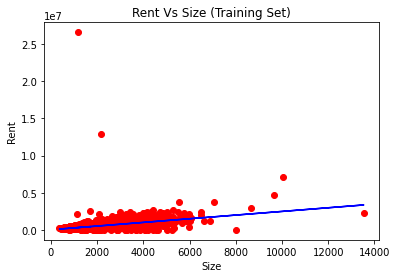

In [95]:
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, regressor.predict(X_train), color="blue")
plt.title("Rent Vs Size (Training Set)")
plt.xlabel("Size")
plt.ylabel("Rent")
plt.show()

The above graph shows the real values (red dots) in relation to the observed values (blue line) in the training set. 

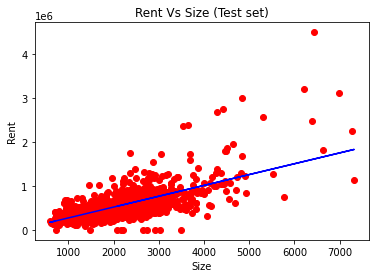

In [96]:
plt.scatter(X_test, y_test, color = "red") #this is the real value
plt.plot(X_test, y_pred, color = "blue") #this is the predicted value
plt.title("Rent Vs Size (Test set)")
plt.xlabel("Size")
plt.ylabel("Rent")
plt.show()

CONCLUSION: 
This above experiment was perfomed assuming the "Sq feet living" feature alone, determines the house price. This assumption was made to implement a simple linear regression model.

We know for single regression model, y = b0 + b1x1
The values of b0 and b1 can be determined as follows

In [97]:
coeff1 = regressor.coef_
intercept1 = regressor.intercept_
print("The coefficient of X is b1 = ", coeff1)
print("The constant b0 is ", intercept1)

The coefficient of X is b1 =  [246.10797995]
The constant b0 is  26324.657397976087


Making single predictions


In [148]:
ans1 = regressor.predict([[6500]])
print("The prediction of price for a 6500 sq ft living is ", ans1)

The prediction of price for a 6500 sq ft living is  [1626026.52708554]


**MULTIPLE LINEAR REGRESSION**

---

In the following experiment using various features price of house is determined. 
Some features will not be used since it is assumed they are less significant than others in determing the price. 


In [99]:
#checking the available columns and their types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [100]:
#convert date to get just the year in int type
dataset["date"] = pd.to_datetime(dataset["date"])
dataset['year'] = dataset['date'].dt.strftime('%Y')
dataset['year'] = dataset['year'].astype('int')
dataset.drop(['date'],axis=1,inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  street         4600 non-null   object 
 14  city           4600 non-null   object 
 15  statezip       4600 non-null   object 
 16  country        4600 non-null   object 
 17  year           4600 non-null   int64  
dtypes: float

We see there is only one country. The features like street, statezip and country are assumed to not have much significance. Hence we remove them from the database

In [101]:
dataset["country"].value_counts()

USA    4600
Name: country, dtype: int64

In [102]:
dataset = dataset.drop(columns=["street", "statezip", "country"])

In [103]:
dataset.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,year
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,2014
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,2014
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,2014
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,2014
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,2014


In [104]:
#to make dtype of city change from object to int

dataset["city"]= dataset["city"].apply({"Seattle":0, "Renton":1, "Bellevue":2, "Redmond":3, "Issaquah":4, "Kirkland":5, "Kent":6, "Auburn":7, "Sammamish":8, "Federal Way":9, 
 "Shoreline":9, "Woodinville":10, "Maple Valley":11, "Mercer Island":12, "Burien":13, "Snoqualmie": 14, "Kenmore":15, "Des Moines":16, 
 "North Bend":17, "Covington":18, "Duvall":19, "Lake Forest Park":20, "Bothell":21, "Newcastle":22, "SeaTac":23, "Tukwila":24, "Vashon":25,
 "Enumclaw":26, "Carnation":27, "Normandy Park":28, "Clyde Hill":29, "Medina":30, "Fall City":31, "Black Diamond":32, "Ravensdale":33, "Pacific":34, 
 "Algona":35, "Yarrow Point":36, "Skykomish":37, "Preston":38, "Milton":39, "Inglewood-Finn Hill":40, "Snoqualmie Pass":41, "Beaux Arts Village":42
}.get)

In [105]:
dataset.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,year
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,9,2014
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,0,2014
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,6,2014
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,2,2014
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,3,2014


In [106]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  city           4600 non-null   int64  
 14  year           4600 non-null   int64  
dtypes: float64(4), int64(11)
memory usage: 539.2 KB


Selecting the independent and dependent variables

In [107]:
X = dataset.drop(columns="price", axis = 1)
y = dataset["price"]

In [108]:
print(X)

      bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0          3.0       1.50         1340      7912     1.5           0     0   
1          5.0       2.50         3650      9050     2.0           0     4   
2          3.0       2.00         1930     11947     1.0           0     0   
3          3.0       2.25         2000      8030     1.0           0     0   
4          4.0       2.50         1940     10500     1.0           0     0   
...        ...        ...          ...       ...     ...         ...   ...   
4595       3.0       1.75         1510      6360     1.0           0     0   
4596       3.0       2.50         1460      7573     2.0           0     0   
4597       3.0       2.50         3010      7014     2.0           0     0   
4598       4.0       2.00         2090      6630     1.0           0     0   
4599       3.0       2.50         1490      8102     2.0           0     0   

      condition  sqft_above  sqft_basement  yr_built  yr_renova

In [109]:
print(y)

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64


Splitting the dataset in train and test set

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Building and Training the model

In [111]:
from sklearn.linear_model import LinearRegression
multi_reg = LinearRegression()
multi_reg.fit(X_train, y_train)

LinearRegression()

Testing the model

In [112]:
y_pred = multi_reg.predict(X_test)

Evaluating the score of trained model on test set

In [113]:
from sklearn.metrics import mean_squared_error, r2_score
mse2 = mean_squared_error(y_test, y_pred)
r2_score_2 = r2_score(y_test, y_pred)
print("The Mean Square Error for multiple linear regression is ", mse2)
print("The r2 score for multiple linear regression is ", r2_score_2)

The Mean Square Error for multiple linear regression is  65046139726.26597
The r2 score for multiple linear regression is  0.5603458393061493


Multiple Linear regression is:
y = b0 + x1b1 + x2b2 + x3b3 + ... + xnbn
The value of b0, b1, b2 ..., bn can be determined as follows

In [114]:
coeff = multi_reg.coef_
intercept = multi_reg.intercept_
print("The coefficients b1, b2 ... bn are: ", coeff)
print("B0 is ", intercept)

The coefficients b1, b2 ... bn are:  [-5.57912526e+04  6.19636552e+04  1.57463284e+02 -4.75542929e-01
  1.34457636e+04  3.37189372e+05  4.68674189e+04  3.52750183e+04
  9.66884282e+01  6.07748556e+01 -1.90205277e+03  7.14441251e+00
 -5.40074523e+03  0.00000000e+00]
B0 is  3702473.416198492


Making new predictions on trained model

A 5 bedroom 6 bath house with 6500 sq feet living, 15600 sq feet loft, is on the 5th floor, with 1 waterfront and 1 view, in condition 5, has 5000 sq feet above and 2000 basement, was built in 2007 and has not been renovated, is in Seattle city and available for year 2019. 

In [194]:
ans = multi_reg.predict([[5, 6, 6500, 15600, 5, 1, 1, 5, 5000, 2000, 2007, 0, 0, 2019]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [195]:
print("The predicted house price on the basis of above requirements is ", ans)

The predicted house price on the basis of above requirements is  [2226624.59969949]


**POLYNOMIAL LINEAR REGRESSION**


---


In the following experiment sq feet living determines the price of housing. This experiment also helps understand whether the data is linear or non-linear.

Loading dataset

In [122]:
dataset.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,year
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,9,2014
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,0,2014
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,6,2014
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,2,2014
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,3,2014


Determing independent and dependent variables

In [123]:
X = dataset.iloc[:, 3].values
y = dataset.iloc[:, 0].values

In [124]:
print(X)

[1340 3650 1930 ... 3010 2090 1490]


In [125]:
X = X.reshape(-1, 1)

In [126]:
print(X)

[[1340]
 [3650]
 [1930]
 ...
 [3010]
 [2090]
 [1490]]


In [127]:
print(y)

[ 313000.       2384000.        342000.       ...  416904.166667
  203400.        220600.      ]


Building and Training Polynomial regression model

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [129]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
poly_X_train = poly_reg.fit_transform(X_train)
poly_X_test = poly_reg.fit_transform(X_test)

In [130]:
from sklearn.linear_model import LinearRegression
poly_reg1 = LinearRegression()
poly_reg1.fit(poly_X_train, y_train)

LinearRegression()

Predicting test set on polynomial regression model

In [31]:
y_poly_pred = poly_reg1.predict(poly_X_test)

Visualizing Results

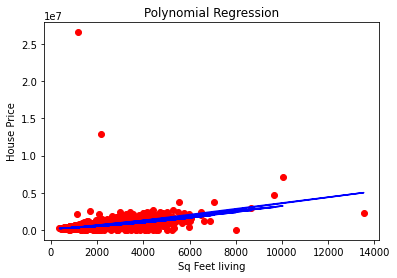

In [131]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, poly_reg1.predict(poly_reg.fit_transform(X_train)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Sq Feet living')
plt.ylabel('House Price')
plt.show()

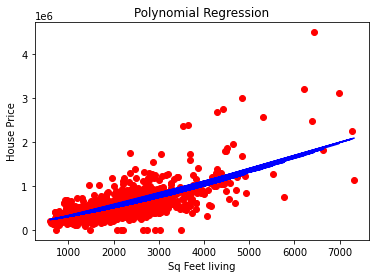

In [132]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, poly_reg1.predict(poly_reg.fit_transform(X_test)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Sq Feet living')
plt.ylabel('House Price')
plt.show()

Since the fiited line (blue line) is not parabolic, the data is linear

Evaluating the model

In [133]:
from sklearn.metrics import mean_squared_error, r2_score 
mse3 = mean_squared_error(y_test, y_poly_pred)
r2_score3 = r2_score(y_test, y_poly_pred)
print("The mean squared error for polynomial regression is ", mse3)
print("The r2 score for polynomial regression is ", r2_score3)

The mean squared error for polynomial regression is  76206680610.4667
The r2 score for polynomial regression is  0.48491049055245083


In [134]:
coe3 = poly_reg1.coef_
intercept3 = poly_reg1.intercept_
print("The coefficient b0 is ", intercept3, " and the coefficient b1 b2 ... bn are ", coe3)

The coefficient b0 is  136558.98222879053  and the coefficient b1 b2 ... bn are  [0.00000000e+00 1.55582086e+02 1.51025014e-02]


In [144]:
ans3 = poly_reg1.predict(poly_reg.fit_transform([[6500]]))
print("The price of 6000 sq feet house is ", ans3)

The price of 6000 sq feet house is  [1785923.22287117]


In [143]:
dataset[(dataset["sqft_living"]==6500)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,year
4135,2458000.0,4.0,5.25,6500,14986,2.0,0,0,3,5180,1320,2001,0,30,2014


**CONCLUSION**


---

The price of house for 6000 sq feet living according to data is 2,458,000

For simple linear regression price of 6000 sq feet living is 1,626,026

For multiple linear regression price of 6000 sq feet living is 2,226,624

For polynomial regression price of 6000 sq feet living is almost 1,613,741


---

Using various features to determine the price of house brings the prediction closer to actual value